### 2019.11.18. Machine Learning Classification<br>
# Social_Network_Ads

In [2]:
# 0. Package 가져오기
import pandas as pd
import numpy as np

In [3]:
# 1.  CSV 데이터 가져오기
data=pd.read_csv('Social_Network_Ads.csv')
data.head()

,User ID,Gender,Age,EstimatedSalary,Purchased
0,15624510,Male,19.0,19000.0,0
1,15810944,Male,35.0,20000.0,0
2,15668575,Female,26.0,NaN,0
3,15603246,Female,27.0,57000.0,0
4,15804002,Male,NaN,76000.0,0


In [4]:
# 2. feature/label 나누기
X=data.iloc[:,1:4].to_numpy()
y=data.iloc[:,4].to_numpy()
print(X)
print(y)

[['Male' 19.0 19000.0]
 ['Male' 35.0 20000.0]
 ['Female' 26.0 nan]
 ...
 ['Female' 50.0 20000.0]
 ['Male' 36.0 33000.0]
 ['Female' 49.0 36000.0]]
[0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 1 1 1 1 1 1 1 1 1 1 1 1 0 0 0 1 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0
 0 1 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 1 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 1 0
 0 0 0 0 0 0 0 0 0 0 0 1 1 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 1 0 1 0 1 0 1 1 0 0 0 1 0 0 0 1 0 1
 1 1 0 0 1 1 0 1 1 0 1 1 0 1 0 0 0 1 1 0 1 1 0 1 0 1 0 1 0 0 1 1 0 1 0 0 1
 1 0 1 1 0 1 1 0 0 1 0 0 1 1 1 1 1 0 1 1 1 1 0 1 1 0 1 0 1 0 1 1 1 1 0 0 0
 1 1 0 1 1 1 1 1 0 0 0 1 1 0 0 1 0 1 0 1 1 0 1 0 1 1 0 1 1 0 0 0 1 1 0 1 0
 0 1 0 1 0 0 1 1 0 0 1 1 0 1 1 0 0 1 0 1 0 1 1 1 0 1 0 1 1 1 0 1 1 1 1 0 1
 1 1 0 1 0 1 0 0 1 1 0 1 1 1 1 1 1 0 1 1 1 1 1 1 0 1 1 1 0 1]


In [5]:
# 3-1. Clean Missing Data-number
data.isnull().sum()
from sklearn.impute import SimpleImputer
imputer=SimpleImputer(missing_values=np.nan,strategy='mean')
X[:,1:]=imputer.fit_transform(X[:,1:])

In [22]:
# 3-2. Clean Missing Data-category
imputer=SimpleImputer(missing_values=np.nan,strategy='most_frequent')
X[:,0:1]=imputer.fit_transform(X[:,0:1])

### Imputer
imputer=Imputer(strategy='mean')

imputer.fit(X) ---> X에 대해서 학습<br>
imputer.transform(y) --->이경우 y에 대한 평균이 아닌 X에서 학습한 평균값이 들어감

imputer.fit(X)<br>
impter.transform(X)

X=imputer.fit_transform(X)  --->위의 두줄을 합친것

In [13]:
# 4. Make Categorical
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer 
ct=ColumnTransformer([('one_hot_encoder',OneHotEncoder(),[0])],remainder='passthrough')
X=ct.fit_transform(X)
print(pd.DataFrame(X))

     0  1        2        3
0    0  1       19    19000
1    0  1       35    20000
2    1  0       26  69628.9
3    1  0       27    57000
4    0  1  37.7821    76000
..  .. ..      ...      ...
395  1  0       46    41000
396  0  1       51    23000
397  1  0       50    20000
398  0  1       36    33000
399  1  0       49    36000

[400 rows x 4 columns]


### One Hot Encoding

sklearn을 활용하는 방법 외에도 여러가지 방법이 있다<br>
Ex) pandas 활용하기
- data = pd.get_dummies(data, drop_first=True)

In [60]:
# 5. Split Train/Test Set
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=400)
print('X_train:',X_train.shape)
print('y_train:', y_train.shape)
print('X_test:', X_test.shape)
print('y_test:', y_test.shape)

X_train: (320, 4)
y_train: (320,)
X_test: (80, 4)
y_test: (80,)


In [61]:
# 6. Standardization
from sklearn.preprocessing import MinMaxScaler
scaler=MinMaxScaler()
X_train[:,1:4]=scaler.fit_transform(X_train[:,1:4])
X_test[:,1:4]=scaler.fit_transform(X_test[:,1:4])

In [62]:
# 7. Train
from sklearn.linear_model import LogisticRegression
classifier = LogisticRegression()
classifier.fit(X_train, y_train)


C:\Users\82102\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='warn', n_jobs=None, penalty='l2',
                   random_state=None, solver='warn', tol=0.0001, verbose=0,
                   warm_start=False)

In [63]:
# 8. Predict(Scoring)
y_pred=classifier.predict(X_test)

In [64]:
# 9. Evaluate
from sklearn.metrics import accuracy_score
accuracy_score(y_test,y_pred)

0.825

In [67]:
# 10. ConfusionMatrix 
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, y_pred)
print(cm)

[[51  6]
 [ 8 15]]


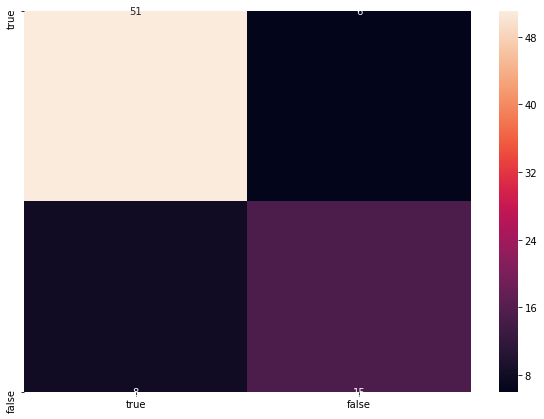

In [68]:
# 11. ConfusionMatrix Visualize
import matplotlib.pyplot as plt
import seaborn as sn

df_cm = pd.DataFrame(cm, index = ['true', 'false'],
                    columns = ['true', 'false'])
plt.figure(figsize = (10,7))
sn.heatmap(df_cm, annot=True)